#Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

#Load Dataset from GitHub

In [9]:
url = 'https://raw.githubusercontent.com/sharad00004/AI-ML-HACKATHON-Datasets/main/electricity_bill_dataset.csv'
df = pd.read_csv(url)

print("✅ Dataset Loaded from GitHub!")
print("\n📄 First 5 rows:")
print(df.head())

✅ Dataset Loaded from GitHub!

📄 First 5 rows:
   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0     

#Initial Data Exploration

In [10]:
print("\n📊 Dataset Info:")
print(df.info())

print("\n🧼 Checking for missing values:")
print(df.isnull().sum())


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB
None

🧼 Checking for missing values:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month

#1. Missing Values Heatmap

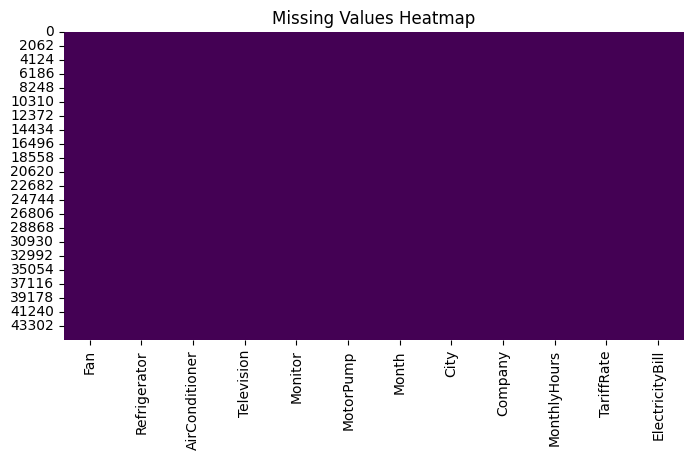

In [11]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# 2. Histograms for numerical features

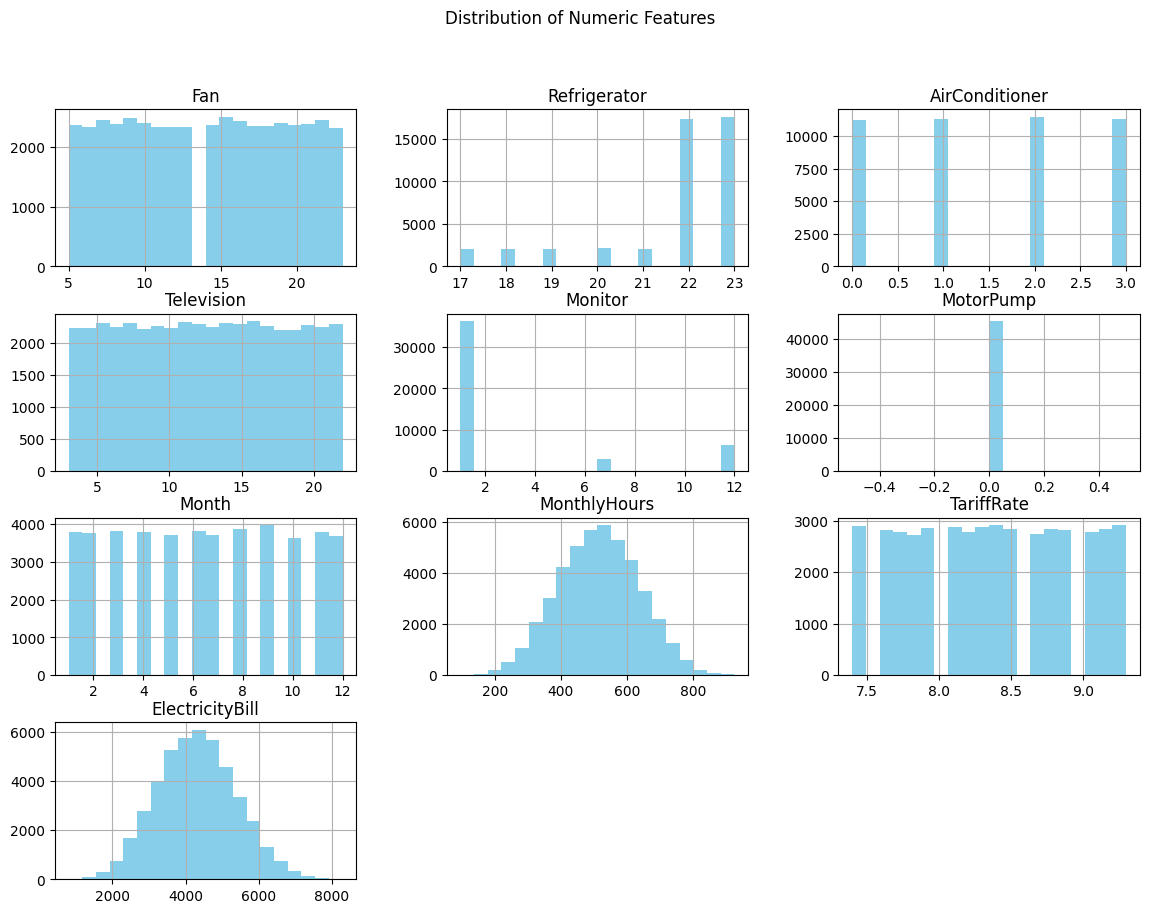

In [12]:
df.hist(figsize=(14, 10), bins=20, color='skyblue')
plt.suptitle("Distribution of Numeric Features")
plt.show()

#3. Correlation heatmap - Only include numeric columns

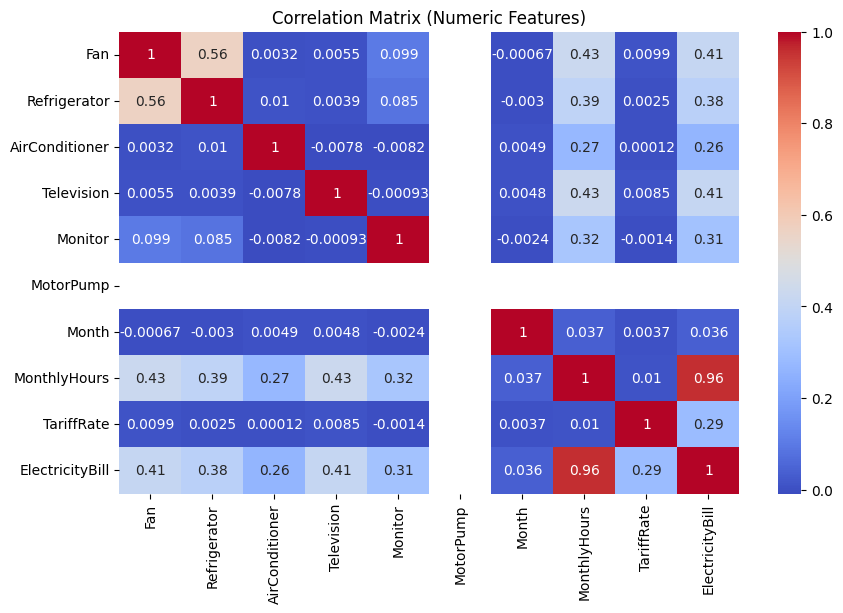

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# 4. Boxplots for categorical vs target

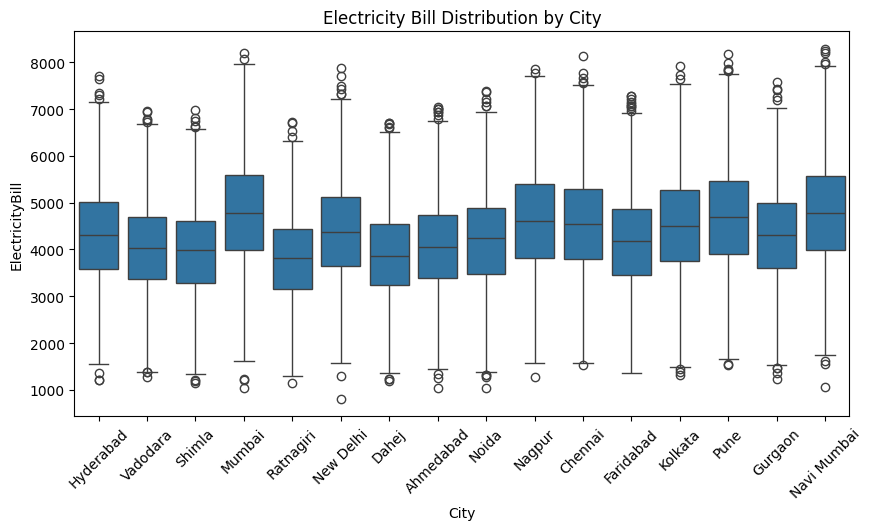

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='City', y='ElectricityBill')
plt.title("Electricity Bill Distribution by City")
plt.xticks(rotation=45)
plt.show()

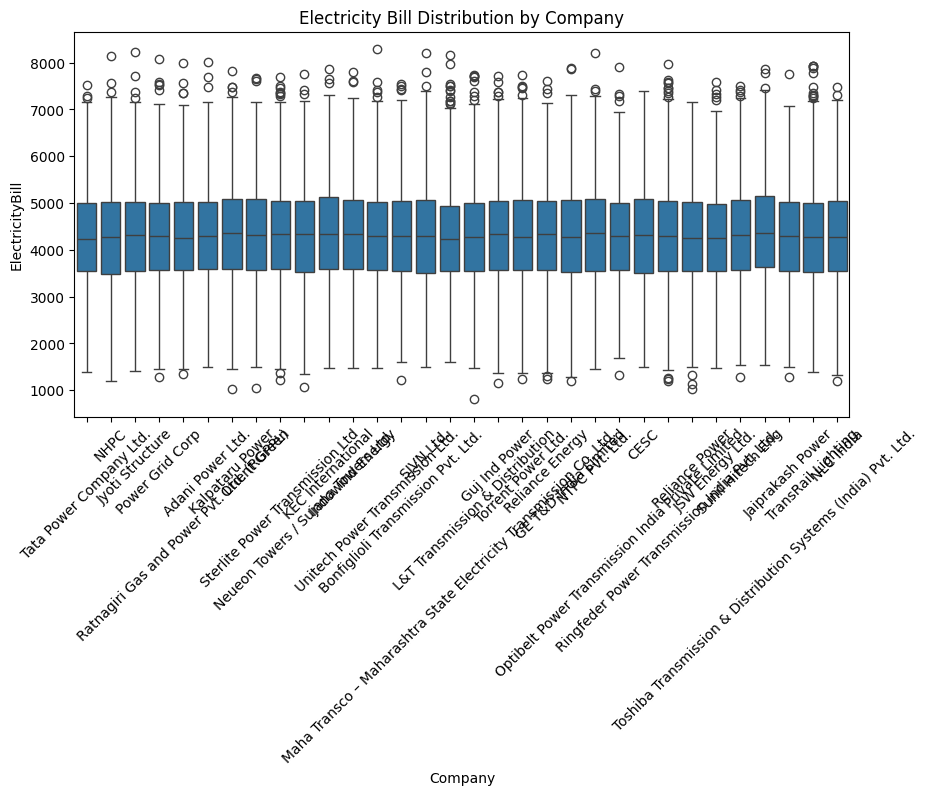

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Company', y='ElectricityBill')
plt.title("Electricity Bill Distribution by Company")
plt.xticks(rotation=45)
plt.show()

# 🧹 Step 5: Preprocessing

# 1. Drop or fill missing values

In [16]:
df = df.dropna()

# 2. Encode categorical variables

In [17]:
categorical_cols = ['City', 'Company']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Split features and target

In [19]:
X = df.drop('ElectricityBill', axis=1)
y = df['ElectricityBill']

# 4. Scale features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#  Step 6: Train & Compare Models

# Dictionary of models

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

results = []


# Train and evaluate all models

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

# Sort by RMSE

In [24]:
results.sort(key=lambda x: x[1])

# Display results

In [25]:
print("\n📊 Model Performance Comparison:")
print(f"{'Model':<20} {'RMSE':<10} {'R² Score':<10}")
print("="*40)
for name, rmse, r2 in results:
    print(f"{name:<20} {rmse:<10.4f} {r2:<10.4f}")


📊 Model Performance Comparison:
Model                RMSE       R² Score  
Random Forest        5.3276     1.0000    
Decision Tree        10.5029    0.9999    
Gradient Boosting    22.7708    0.9995    
Linear Regression    70.5003    0.9956    
Ridge Regression     70.5006    0.9956    
Lasso Regression     70.5212    0.9956    
SVR                  417.0816   0.8473    


#  Step 7: Best Model Visualization

# Get best model

In [26]:
best_model_name, best_rmse, best_r2 = results[0]
best_model = models[best_model_name]

# Predict again using best model

In [27]:
y_pred_best = best_model.predict(X_test)


# Visualize predictions

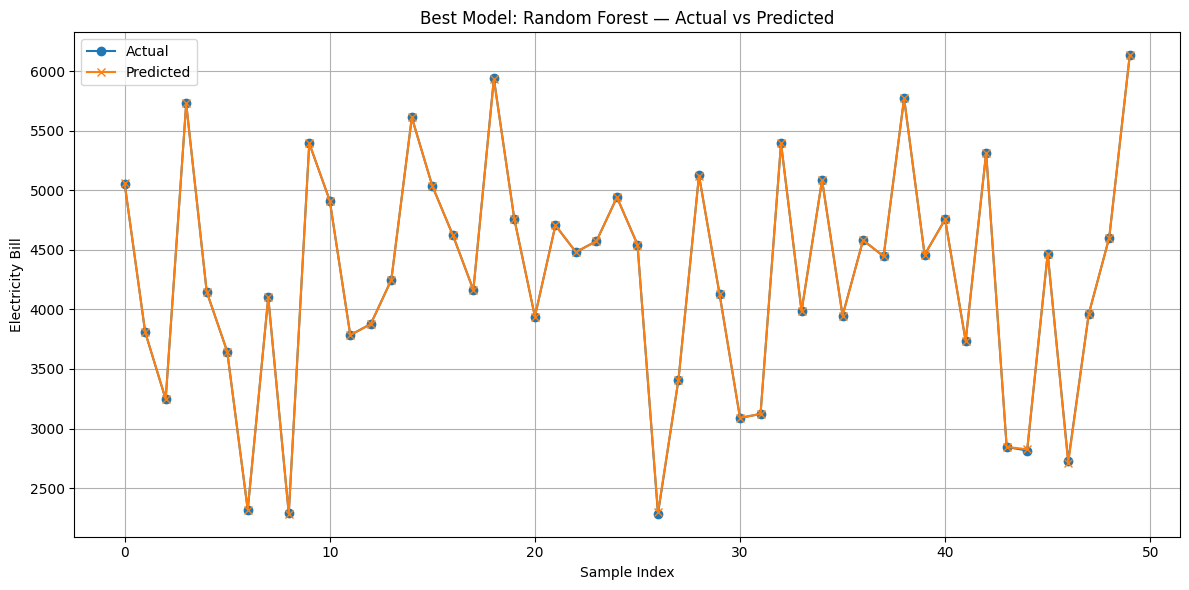

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label="Actual", marker='o')
plt.plot(y_pred_best[:50], label="Predicted", marker='x')
plt.title(f"Best Model: {best_model_name} — Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Electricity Bill")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
print(f"\n✅ Best Performing Model: {best_model_name}")


✅ Best Performing Model: Random Forest
